<a href="https://colab.research.google.com/github/moemag/medical-hypertension-classification/blob/main/medical_hypertension_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the data**


In [103]:
import pandas as pd

sheet_id = '1ZfnNy48RwtK0D_i_B3CmoXUKcpIBt8rBfdBNqzypEko'
gid = '695684010'
data_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
try:
  df = pd.read_csv(data_url)
  print("Successfully loaded the data.")
  print(df.info())
  print(df.describe())
  print(df.isnull().sum())
except Exception as e:
  print(f"An error occurred while loading the data: {e}")

Successfully loaded the data.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  int64  
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 2.8 MB
None
                age          sex            cp      trestbps          chol  \
count  26083.000000  26058.00000  26083.000000  26083.000000  26083.000000   
mean      55.661389      

# Data cleaning

Handling missing values, outliers, and inconsistencies. In this case, the data is numerical.
The code searches for any columns with numerical data that have missing values. If it finds any, it calculates the average of the existing values in that column and then uses that average to fill in the missing spots. Afterward, it shows some information about the dataset to confirm that the missing values have been handled.

In [104]:
# Fill missing numerical values with the mean
for col in df.select_dtypes(include=['number']):
  if df[col].isnull().any():
    df[col] = df[col].fillna(df[col].mean())
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  int64  
 1   sex       26083 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 2.8 MB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **Visualizing the data**
The use of plots and charts to understand data distribution, identify patterns, and detect potential issues. In this case I used:

**Histograms**: To see the distribution of numerical features.

**Heatmap**: To compare the correlation coefficient against Target.

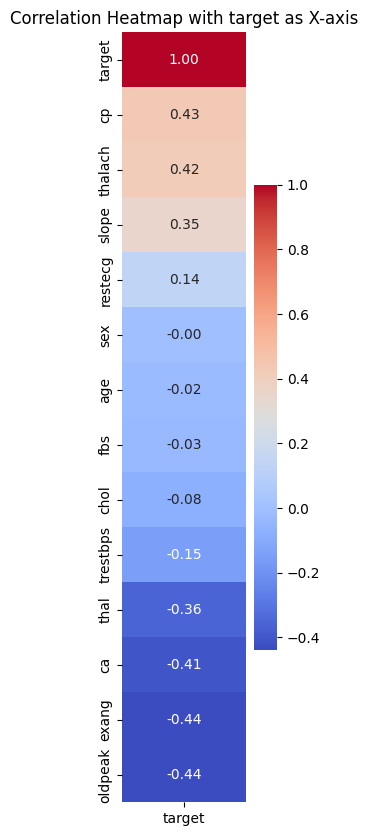

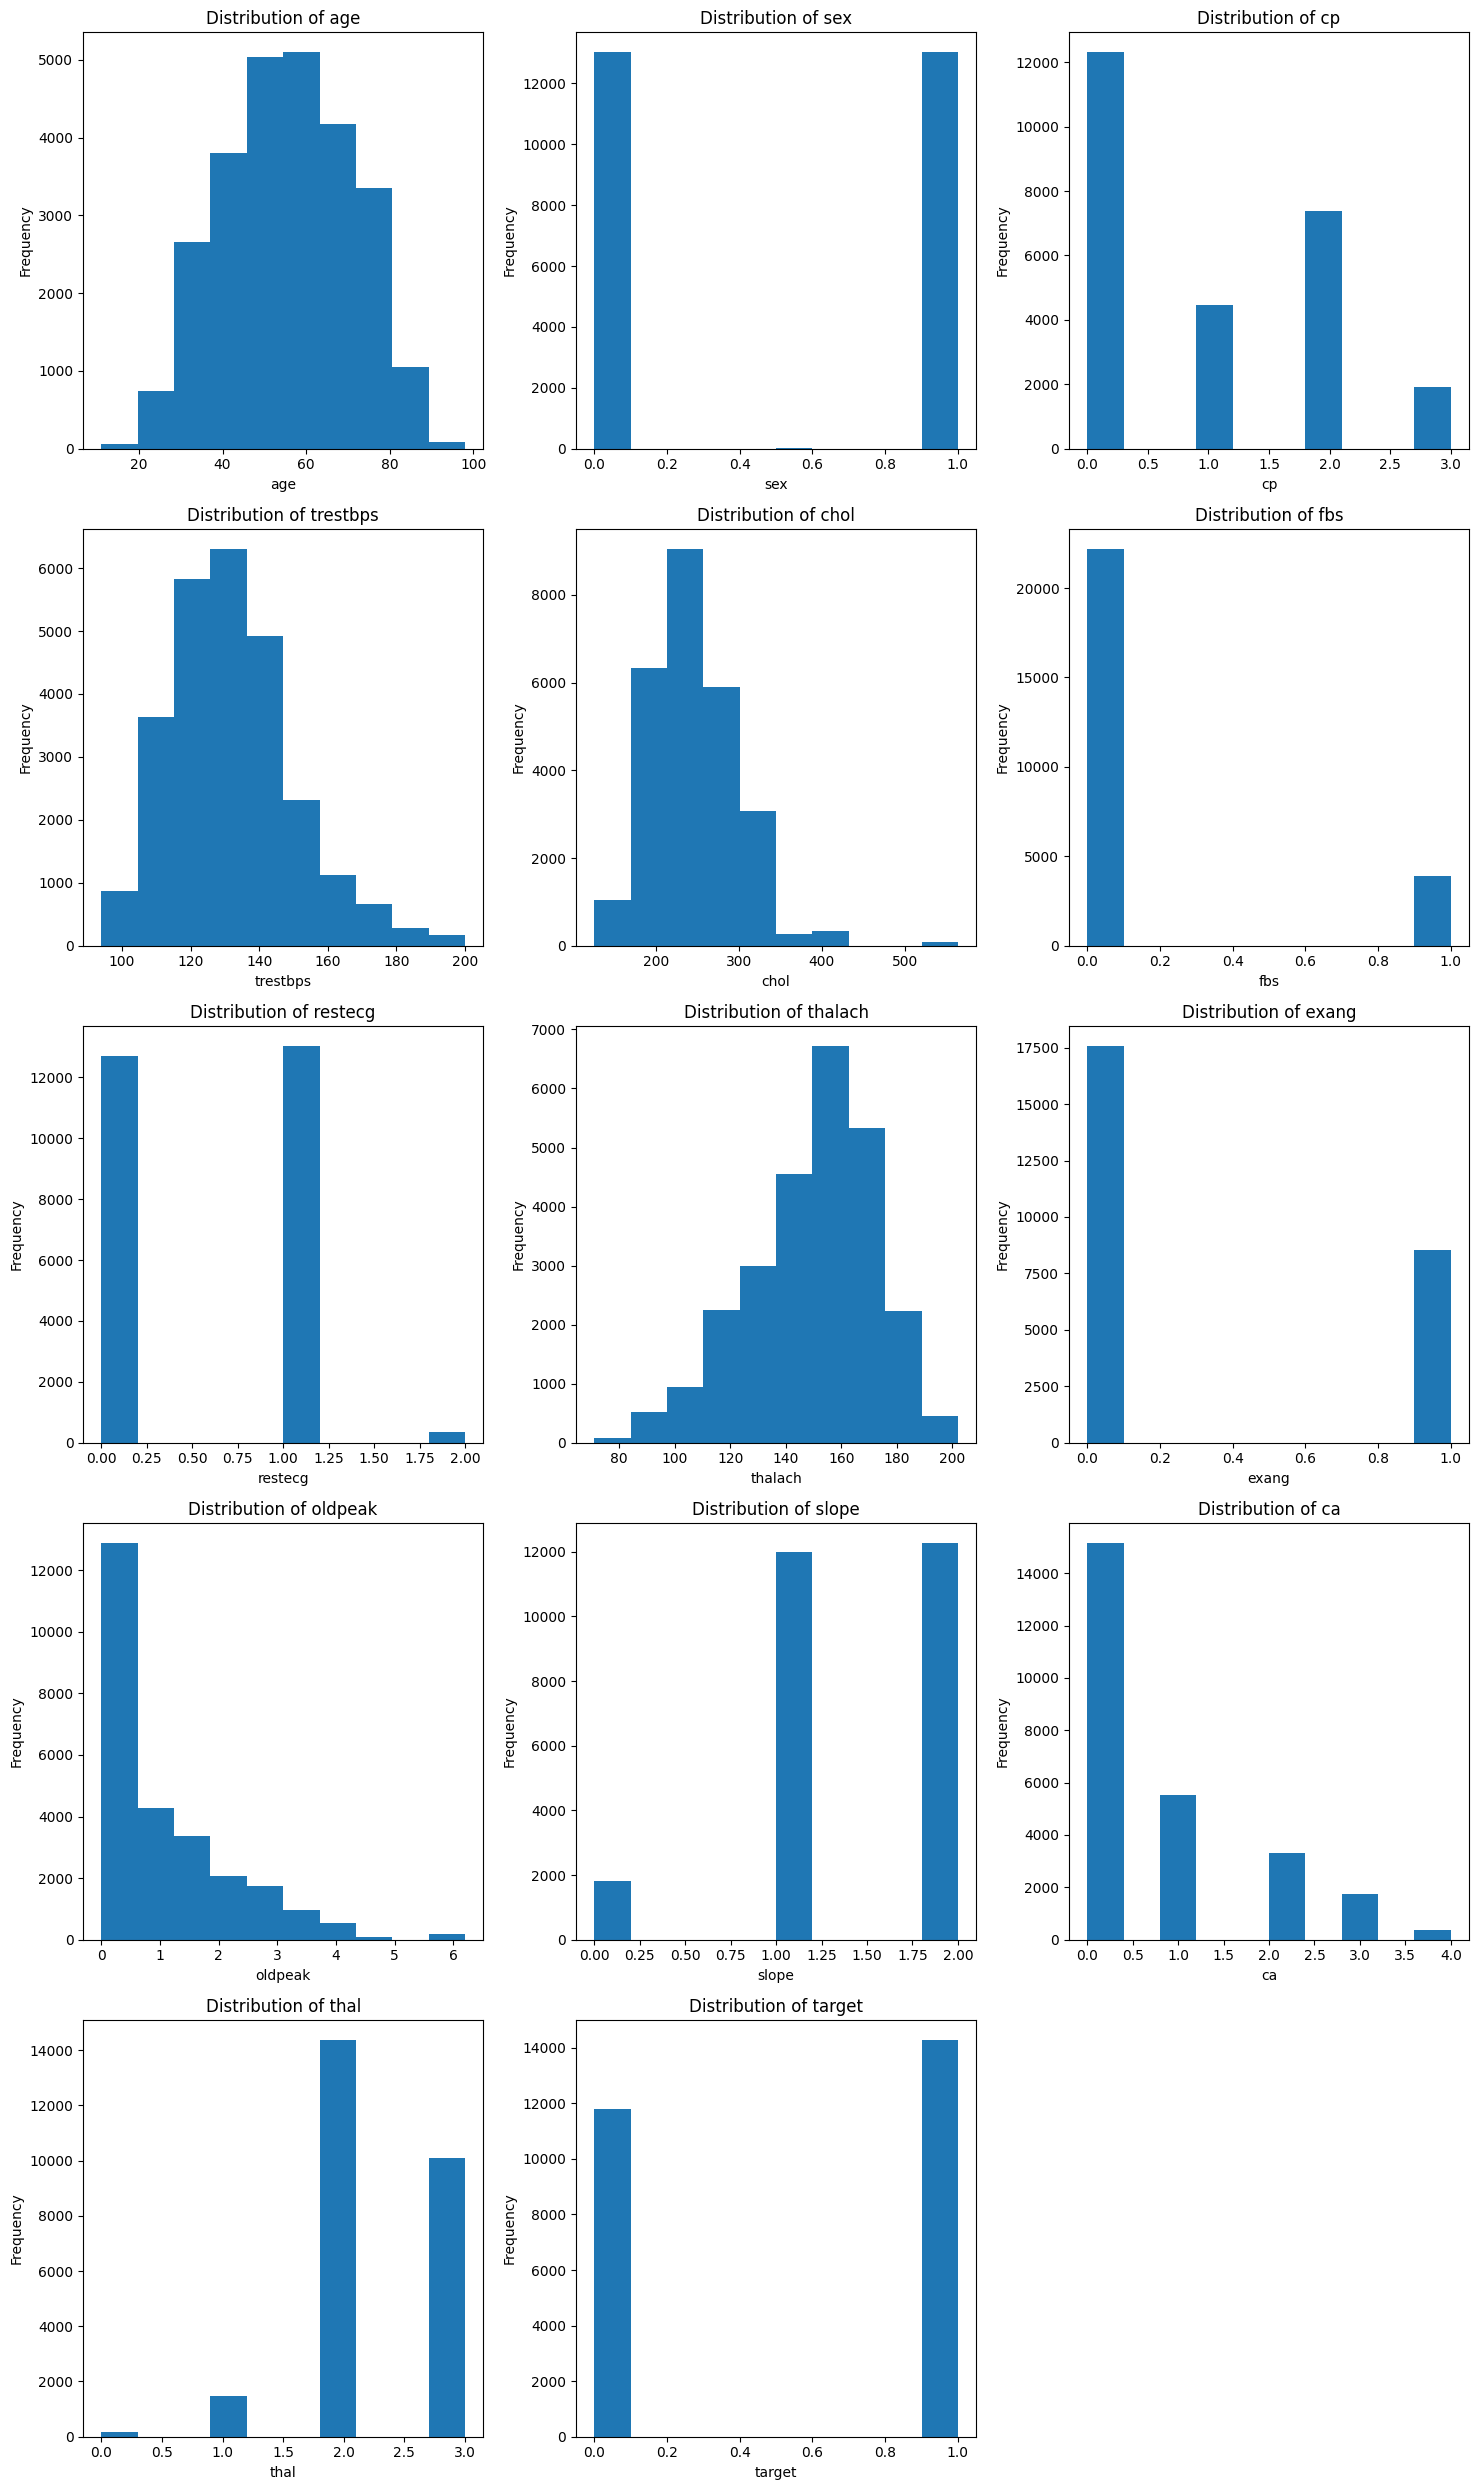

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap with target as x-axis
plt.figure(figsize=(2, 10))
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with target as X-axis')
plt.show()

# Create a figure and subplots
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3  # Calculate rows needed to fit all plots
fig, axes = plt.subplots(num_rows, min(3, num_cols), figsize=(15, 5 * num_rows))

# Flatten the axes array if it's multi-dimensional
axes = axes.ravel()

# Iterate through columns and create histograms
for i, col in enumerate(df.columns):
    if i < len(axes):
      ax = axes[i]
      ax.hist(df[col].dropna(), bins=10)  # Drop NaN values for histogram
      ax.set_title(f"Distribution of {col}")
      ax.set_xlabel(col)
      ax.set_ylabel("Frequency")
    else:
        break

# Adjust layout and remove empty subplots
plt.tight_layout()
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])
plt.show()

# **Data transformation process**:  
This part of the code focuses on preparing the data for use in a machine learning model by scaling it to a standard range (0 to 1) using MinMaxScaler. .

**Scale numerical features:** Apply normalization (using MinMaxScaler) to bring numerical features to a similar scale to improve model performance.

***In case of the presence of categorical features***

**Encode categorical features:** Convert categorical features into numerical representations using label encoding.


```
# In case of categorical features:  encoding using Label Encoding
label_encoder = LabelEncoder()

for feature in categorical_features:
    try:
       df[feature] = label_encoder.fit_transform(df[feature])
    except TypeError:
        # Handle potential errors if some categorical values are not comparable
        df[feature] = df[feature].astype(str)  # Convert to string first if needed
        df[feature] = label_encoder.fit_transform(df[feature])
```



In [106]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns
# Normalization for numerical features
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


print(df.head())
print(df.info())
print(df.describe())

        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.528736  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.609195  0.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.471264  1.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.517241  0.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.632184  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  target  
0  0.370968    0.0  0.0  0.333333     1.0  
1  0.564516    0.0  0.0  0.666667     1.0  
2  0.225806    1.0  0.0  0.666667     1.0  
3  0.129032    1.0  0.0  0.666667     1.0  
4  0.096774    1.0  0.0  0.666667     1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26083 no

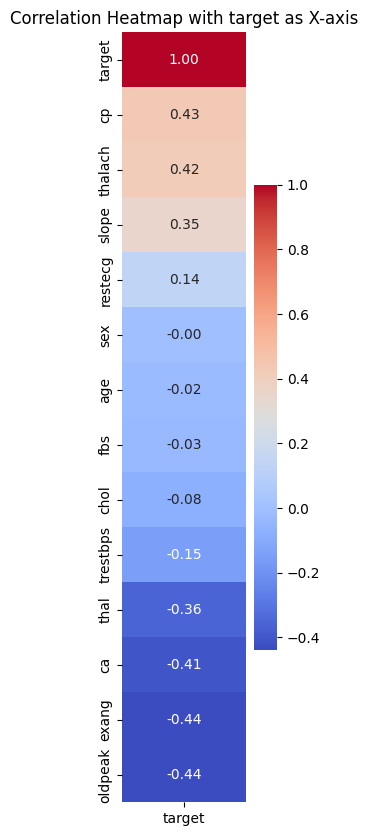

In [107]:
plt.figure(figsize=(2, 10))
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with target as X-axis')
plt.show()

# Data splitting
Setting up the data in a way that allows training  a machine learning model, to assess its performance during training (using the validation set), and finally evaluate its ability to make predictions on completely new data (using the test set). This process is fundamental to building robust and reliable machine learning models. I used an 80-20 split for both train/test and train/validate sets.

In [108]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is your target variable column
X = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

# X_train, y_train: Training data
# X_val, y_val: Validation data
# X_test, y_test: Testing data

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (16692, 13)
Validation data shape: (4174, 13)
Testing data shape: (5217, 13)


# Training the data

This part of the code systematically trains, evaluates, and compares the preformance of 3 implemented classification algorithms for supervised learning.


1.   logistic regression
2.   SVM
3. KNN

**The evaluation metrics used:**

1.   accuracy
2.   precision
3. recall
4. f1_score
5. confusion matrix

**Visualize the results:**

Display confusion matrices for each model.
Create a bar chart comparing the accuracy of the models.

Performance Comparison:

Logistic Regression:
  Accuracy: 0.8630
  Precision: 0.8406
  Recall: 0.9263
  F1-score: 0.8814
  Confusion Matrix:
[[1477  403]
 [ 169 2125]]

SVM:
  Accuracy: 0.9566
  Precision: 0.9548
  Recall: 0.9669
  F1-score: 0.9608
  Confusion Matrix:
[[1775  105]
 [  76 2218]]

KNN:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  Confusion Matrix:
[[1880    0]
 [   0 2294]]


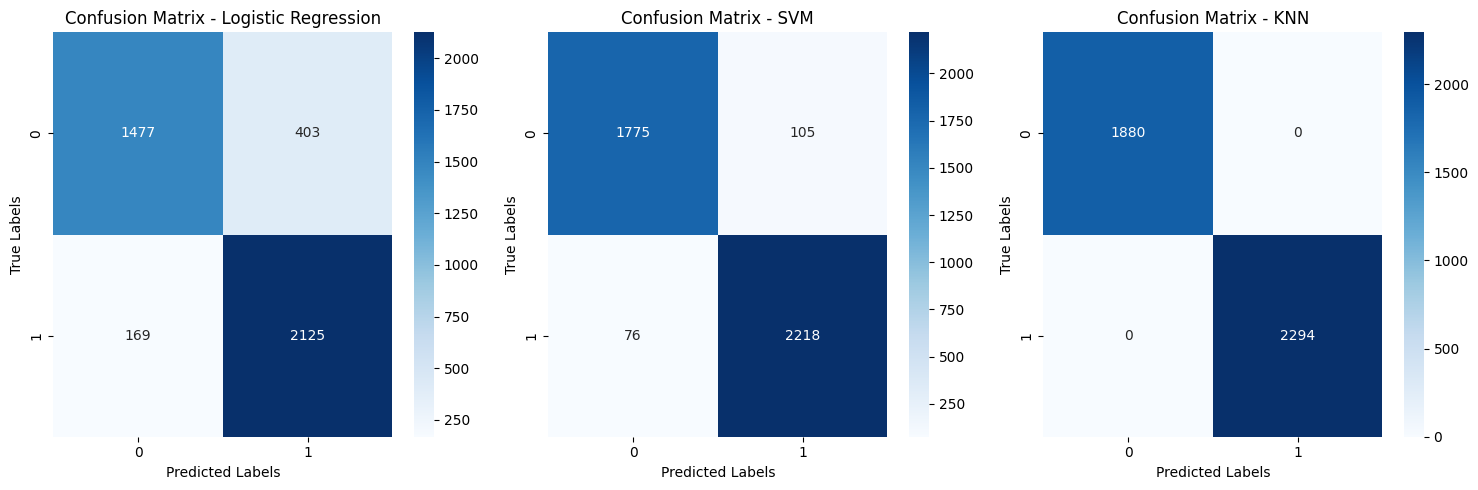

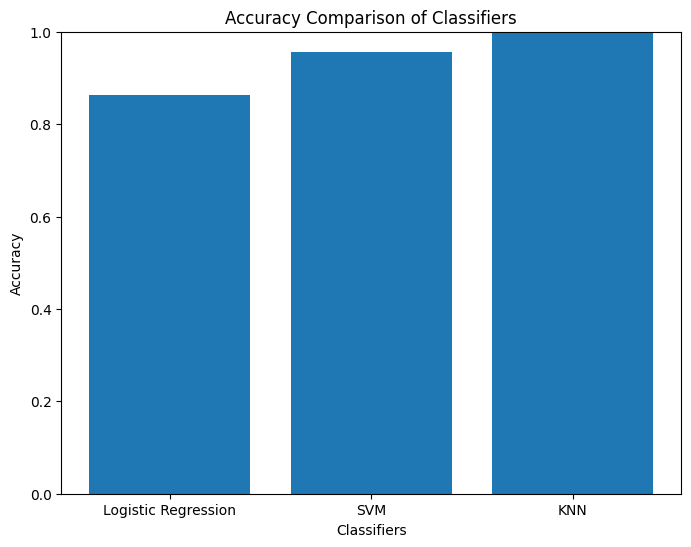

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(random_state=50),
    "KNN": KNeighborsClassifier(n_neighbors=1)
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    results[name] = {
        "accuracy": accuracy_score(y_val, y_pred),
        "precision": precision_score(y_val, y_pred),
        "recall": recall_score(y_val, y_pred),
        "f1_score": f1_score(y_val, y_pred),
        "confusion_matrix": confusion_matrix(y_val, y_pred)
    }

# Comparison of Performances
print("Performance Comparison:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1-score: {metrics['f1_score']:.4f}")
    print("  Confusion Matrix:")
    print(metrics['confusion_matrix'])


# Visualization of Confusion Matrices
plt.figure(figsize=(15, 5))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(metrics["confusion_matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


# Visualization of Accuracy
accuracy_scores = [results[name]['accuracy'] for name in results]
classifier_names = list(results.keys())

plt.figure(figsize=(8, 6))
plt.bar(classifier_names, accuracy_scores)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Classifiers")
plt.ylim(0,1)
plt.show()

KNN classification has the best accuracy when validating the preformance of our classifiers.

# **Testing our model**

Testing the K-Nearest Neighbors (KNN) machine learning model's performance on unseen data (the test data) and visualizing the results.

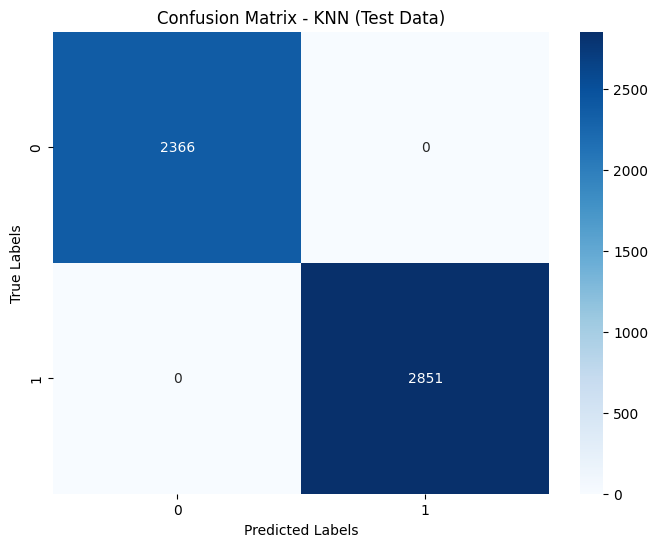

KNN Test Accuracy: 1.0


In [110]:
# Predict the test data
y_pred_knn = classifiers["KNN"].predict(X_test)

# Confusion Matrix for KNN on Test Data
cm_test_knn = confusion_matrix(y_test, y_pred_knn)

# Accuracy on test data
accuracy_test_knn = accuracy_score(y_test, y_pred_knn)

# Plotting the Confusion Matrix for Test Data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN (Test Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"KNN Test Accuracy: {accuracy_test_knn}")

# Since KNN doesn't have epochs, we can't plot accuracy vs epochs.

# CNN Model
since a performance visualization of the accuracy Vs. epochs is required, I will use a simple squential 1D CNN model. For that, the data must be reshaped.


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7952 - loss: 0.4427 - val_accuracy: 0.8658 - val_loss: 0.3267
Epoch 2/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8771 - loss: 0.3084 - val_accuracy: 0.8692 - val_loss: 0.3070
Epoch 3/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9091 - loss: 0.2539 - val_accuracy: 0.8953 - val_loss: 0.2426
Epoch 4/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9254 - loss: 0.2093 - val_accuracy: 0.9181 - val_loss: 0.2112
Epoch 5/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9305 - loss: 0.1816 - val_accuracy: 0.9533 - val_loss: 0.1452
Epoch 6/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9508 - loss: 0.1365 - val_accuracy: 0.9518 - val_loss: 0.1152
Epoch 7/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9626 - loss: 0.1062 - val_accuracy: 0.9720 - val_loss: 0.0962
Epoch 8/50
522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9652 - loss: 0.0943 - val_accuracy: 0.9631 - val_

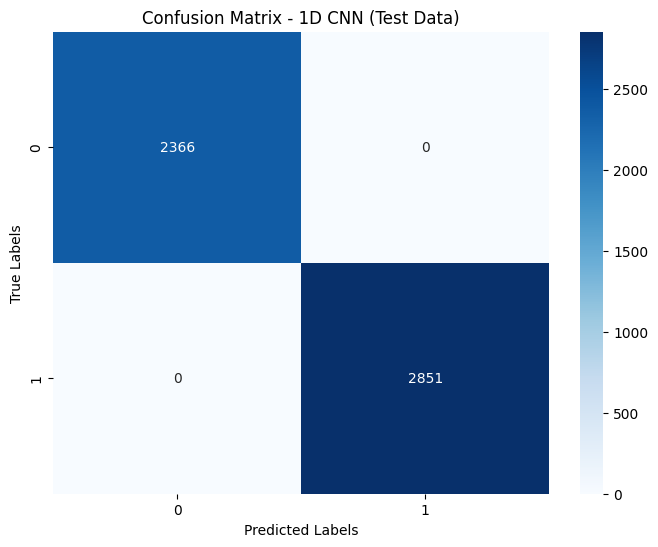

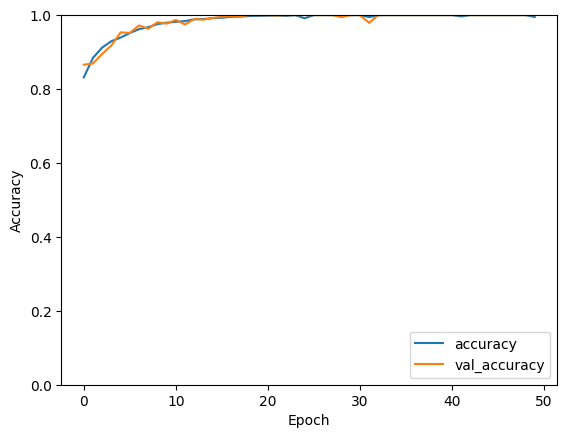

In [111]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Reshape the data for 1D CNN
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


# Define the 1D CNN model
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2, strides=1),
    layers.Flatten(),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=1, activation='sigmoid') # binary classification
])
# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights
)
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Adjust loss for multi-class

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks = [early_stopping] )

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
cm_test = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - 1D CNN (Test Data)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()